<a href="https://colab.research.google.com/github/subhadhana99/Regression/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [835]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [836]:
ground_cricket_data = {"ChirpsperSecond": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# **EDA**


In [837]:
df.describe()

,ChirpsperSecond,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [838]:
df.rename(columns={'Chirps/Second':'Chirpspersecond','Ground Temperature':'Ground_Temperature'},inplace=True)

In [839]:
iqr = df.ChirpsperSecond.quantile(0.75) - df.ChirpsperSecond.quantile(0.25)
upper_threshold = df.ChirpsperSecond.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.ChirpsperSecond.quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(12.9, 19.699999999999996)

In [840]:
iqr = df.Ground_Temperature.quantile(0.75) - df.Ground_Temperature.quantile(0.25)
upper_threshold = df.Ground_Temperature.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Ground_Temperature.quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(58.400000000000006, 98.4)

since the upperthreshold value is nearby maximum value of chirpspersecond we consider there is no outlier 

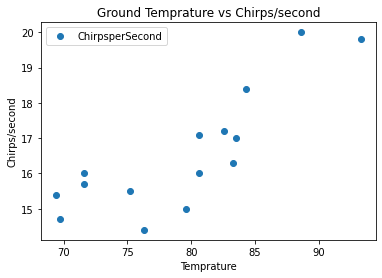

In [841]:
#to check whether there is a linear relation between X and Y
df.plot(x='Ground_Temperature', y='ChirpsperSecond', style='o')
plt.title('Ground Temprature vs Chirps/second')
plt.xlabel('Temprature')
plt.ylabel('Chirps/second')
plt.show()

In [842]:
df.corr()

,ChirpsperSecond,Ground_Temperature
ChirpsperSecond,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


there is a linear relationship between Chrips per second and Ground Temprature.there is no need for transformation.


In [843]:
ground_temp = df[['Ground_Temperature']]
chirps_sec = df['ChirpsperSecond']
regr= LinearRegression()
fitted=regr.fit(ground_temp, chirps_sec)
print(regr.intercept_,regr.coef_)#c

0.45931464523595267 [0.20299973]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


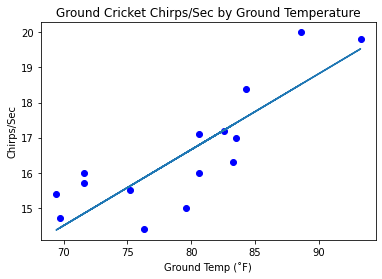

In [844]:
plt.scatter(ground_temp,chirps_sec, color='b')
plt.plot(ground_temp,reg.predict(ground_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [845]:
from sklearn.model_selection import train_test_split 
x = df.loc[:,['Ground_Temperature']].values
y = df.loc[:,'ChirpsperSecond'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=856)

In [846]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
fitted=reg.fit(x_train, y_train)
print(reg.intercept_)#c

-0.6108299955352301


In [847]:
print(reg.coef_) #m


[0.21586441]


In [848]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(reg.coef_[0], reg.intercept_))

Linear Regression Equation: y = 0.2159 * x + -0.6108


the required regression equation is
         y=0.2158*(Ground_Temperature)-0.6108

In [849]:
reg.predict([[95]])

array([19.89628884])

For the ground temperature  95, the approximate rate of crickets to be chirping is 19.89628884

In [850]:
y_pred = reg.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,15.5,15.622174
1,14.7,14.434919
2,15.7,14.845062
3,18.4,17.586540
4,16.3,17.370675


In [851]:
reg.score(x_test,y_test)

0.6639117682836977

Because this is below 0.8, this is not a best fit for this data.


In [852]:
def chirps_to_temp(y):
    chirp = (y - reg.intercept_) / reg.coef_[0]
    print('With an observation of {} chirps/sec, '
          'we expect a ground temp of {:.2f}˚F'.format(y,chirp))

In [853]:
chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 86.22˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [854]:
df2 = pd.read_fwf("brain_body.txt")
df2

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [855]:
df2.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [856]:
df2.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


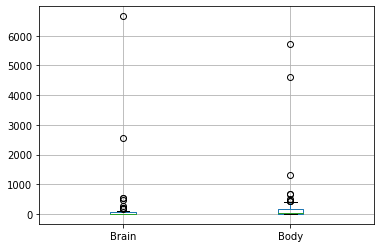

In [857]:
df2.boxplot()

In [858]:
iqr=df2.Body.quantile(0.75) - df2.Body.quantile(0.25)
upb = df2.Body.quantile(0.75) + (1.5 * iqr)
lwb= df2.Body.quantile(0.25) - (1.5 * iqr)
lwb,upb

(-238.375, 408.625)

In [859]:
df2.Body=df2.Body.clip(-238.375, 408.625)

In [860]:
iqr=df2.Brain.quantile(0.75) - df2.Brain.quantile(0.25)
upb = df2.Brain.quantile(0.75) + (1.5 * iqr)
lwb= df2.Brain.quantile(0.25) - (1.5 * iqr)
lwb,upb

(-70.80375000000001, 119.60625)

In [861]:

df2.Brain=df2.Brain.clip(-70.80375000000001, 119.60625)

In [862]:
df2.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


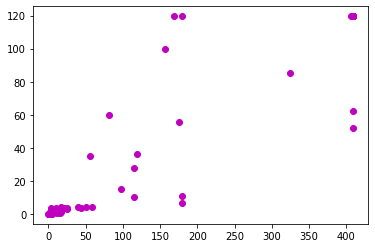

In [863]:
plt.scatter(df2.Body, df2.Brain, color='m')

In [864]:
df2.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


In [865]:
x_train, x_test, y_train, y_test = train_test_split(body,brain, test_size=0.3,random_state=123)

In [866]:
regr.fit(x_train,y_train)
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regr.coef_[0], regr.intercept_))

Linear Regression Equation: y = 0.0242 * x + 23.9530


In [867]:
regr.score(x_train,y_train)

0.20983614904949988

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [868]:
df3= pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [869]:
df3.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000
